## Prueba Tecnica: Mineria de contrastes

### Descripcion del proyecto 

El proyecto consiste en implemtar un flujo de mineria de datos sobre un conjunto de datos con informacion salarial de una orgalizacion. 

Para este proyecto haremos uso de la tecnica llamada `Mineria de contrastes (Contrast Set Mining, CSM), esta es una tecnica de mineria de datos con el proposito de encontrar conjuntos de caracteristicas que señalen diferencias significativas entre grupos. 

### Pasos del proyecto

- Analisis exploratorio de datos: Plantearemos una descripcion exploratoria del conjunto de datos, incluyendo almenos dos visualziaciones de datos.
  
- Pre-procesamiento de datos: La mineria de contrastes trata con datos exclusivamente categoricos, por lo que es necesario aplicar alguna tecnica de transformacion de datos para convertir las variables numericas en variables categoricas

- Mineria de contrastes: Implementa un algoritmo de mineria de contrastes que recupere todos los conjuntos de contraste en los datos proporcionados. Ejecute el algoritmo una vez por cada variable del conjunto de datos, tomandola como variable de grupo. 

#### Descripcion de los datos

##### Caracteristicas

- `JobTitle`: El puesto al cual pertenece.

- `Gender`: Sexo.

- `Age`: Edad.

- `PerfEval`: Rendimiento de evaluacion del 1 al 5 donde 1 es el minimo y 5 es el maximo. 

- `Edu`: Nivel de educacion.

- `Dept`: Area / Departamento de trabajo.

- `Seniority`: antigüedad / Maestria del puesto.
  
- `BasePay`: Sueldo base.

- `Bonus`: Bonos de salario. 

### Antecedentes

Para que un conjunto de contraste sea `viable` es neceario cumplir con los siguientes criterios:

- `Grande`: El conjunto de contraste debe superar la desviacion minima. 
  
- `Significativo`: La asociacion entre la variable de grupo y el conjunto de contraste debe ser estadisticamente significativa. para determinar esto es necesario aplicar la prueba estadistica `chi2` a una tabla con contingencia donde las filas son la pertenencia al conjunto de contraste y las columnas son grupos. Use `0.05` como umbral para completar el `p-value`.
  
- `Productivo`: Un conjunto de contraste es productivo si todos sus subconjuntos propios son tambien conjuntos de contraste viables.  


Justifique su eleccion de valor `MINDEV`  

In [1]:
### importamos librerias

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer


In [2]:
# carga de datos

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('datasets/data.csv')
    

In [3]:
### exploracion inicial de datos

data.head()


,jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   jobTitle   1000 non-null   object
 1   gender     1000 non-null   object
 2   age        1000 non-null   int64 
 3   perfEval   1000 non-null   int64 
 4   edu        1000 non-null   object
 5   dept       1000 non-null   object
 6   seniority  1000 non-null   int64 
 7   basePay    1000 non-null   int64 
 8   bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
data.describe()

,age,perfEval,seniority,basePay,bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


In [6]:
## creacion de grupos para la exploracion de datos

# función que calcule la categoría de edad
def assing_age_range(age):
    if age < 0 or pd.isna(age):
        return 'NA'
    elif age < 20:
        return '0-19'
    elif age < 40:
        return '20-39'
    elif age < 60:
        return '40-59'
    elif age >= 60:
        return '60+'


In [7]:
data['age_group'] = data['age'].apply(assing_age_range)
data.head()

,jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus,age_group
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,0-19
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,20-39
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,0-19
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,20-39
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,20-39


In [8]:
data['total_salary'] = data['basePay'] + data['bonus']

In [9]:
# función que calcule la categoría de ingresos

def total_salary_range(salary):
    if salary < 40000 or pd.isna(salary):
        return '< 40,000'
    elif salary < 80001:
        return '40,000-80,000'
    elif salary < 120001:
        return '80,001-120,000'
    elif salary < 160001:
        return '120,001-160,000'
    elif salary >= 160001:
        return '> 160,000'

In [10]:
data['total_salary_range'] = data['total_salary'].apply(total_salary_range)
data.head()


,jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus,age_group,total_salary,total_salary_range
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,0-19,52301,"40,000-80,000"
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,20-39,119604,"80,001-120,000"
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,0-19,99476,"80,001-120,000"
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,20-39,118234,"80,001-120,000"
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,20-39,108783,"80,001-120,000"


### Analisis exploratorio de datos

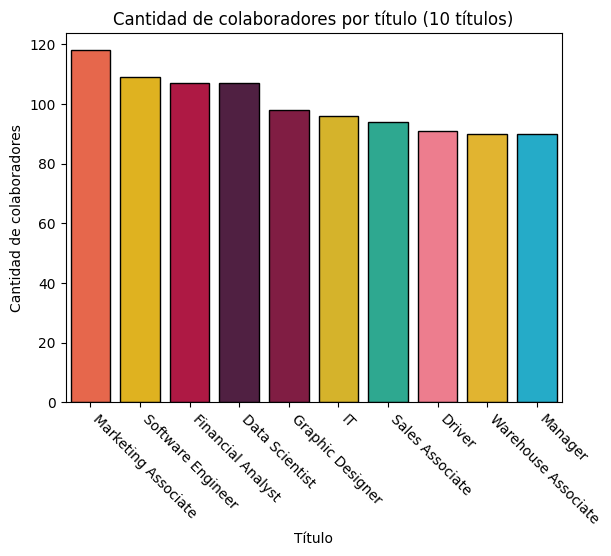

In [11]:
# Creamos un DataFrame con la cantidad de cada título
num_titulos = data['jobTitle'].value_counts().reset_index()
num_titulos.columns = ['jobTitle', 'colaboradores']

colores = ['#FF5733', '#FFC300', '#C70039', '#581845', '#900C3F', '#F1C40F', '#1ABC9C', '#FF6B81', '#FFC312', '#0ABDE3']

sns.barplot(x='jobTitle', y='colaboradores', data=num_titulos, edgecolor='black',palette=colores)

plt.xlabel("Título")
plt.ylabel("Cantidad de colaboradores")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title(f"Cantidad de colaboradores por título ({len(num_titulos)} títulos)")
plt.show()


   genero  colaboradores
0    Male            532
1  Female            468


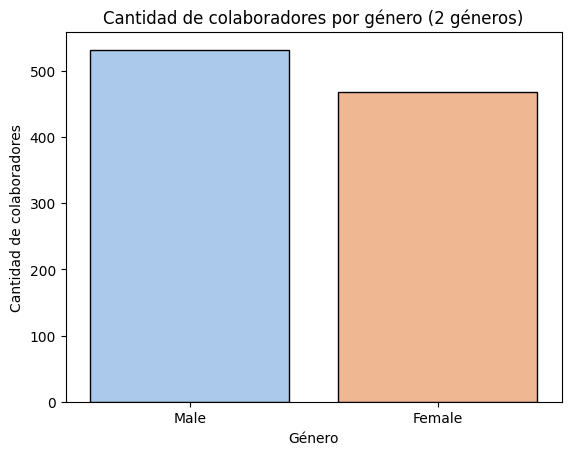

In [12]:
# genero

generos = data['gender'].unique()
num_generos = len(generos)

colors=['#a1c9f4','#ffb482']

# Creamos un DataFrame con la cantidad de cada género
conteo_generos = data['gender'].value_counts().reset_index()
conteo_generos.columns = ['genero', 'colaboradores']

sns.barplot(x='genero', y='colaboradores', data=conteo_generos,palette=colors,edgecolor='black')

print(conteo_generos)

plt.xlabel("Género")
plt.ylabel("Cantidad de colaboradores")
plt.title(f"Cantidad de colaboradores por género ({num_generos} géneros)")
plt.show()




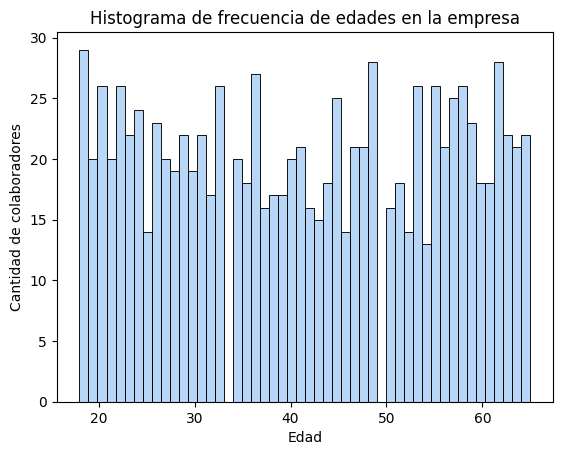

In [13]:
(
    sns.histplot(data=data['age'], bins=50, color='#a1c9f4')
    .set(title='Histograma de frecuencia de edades en la empresa', 
            xlabel='Edad', 
            ylabel='Cantidad de colaboradores')
)
plt.show()

##### Caracteristicas principales de las edades

Podemos observar uniformidad entre las edades en la empresa con picos alrededor de `18`, `33`, `37`, `48` y `62` años.

Asi como podriamos destacar valles en `26`, `35` y `49` años. 

Otros datos a destacar:

- Edad minima: `18 años`
  
- Mediana de edad: `41 años` 

- Edad maxima: `65 años`

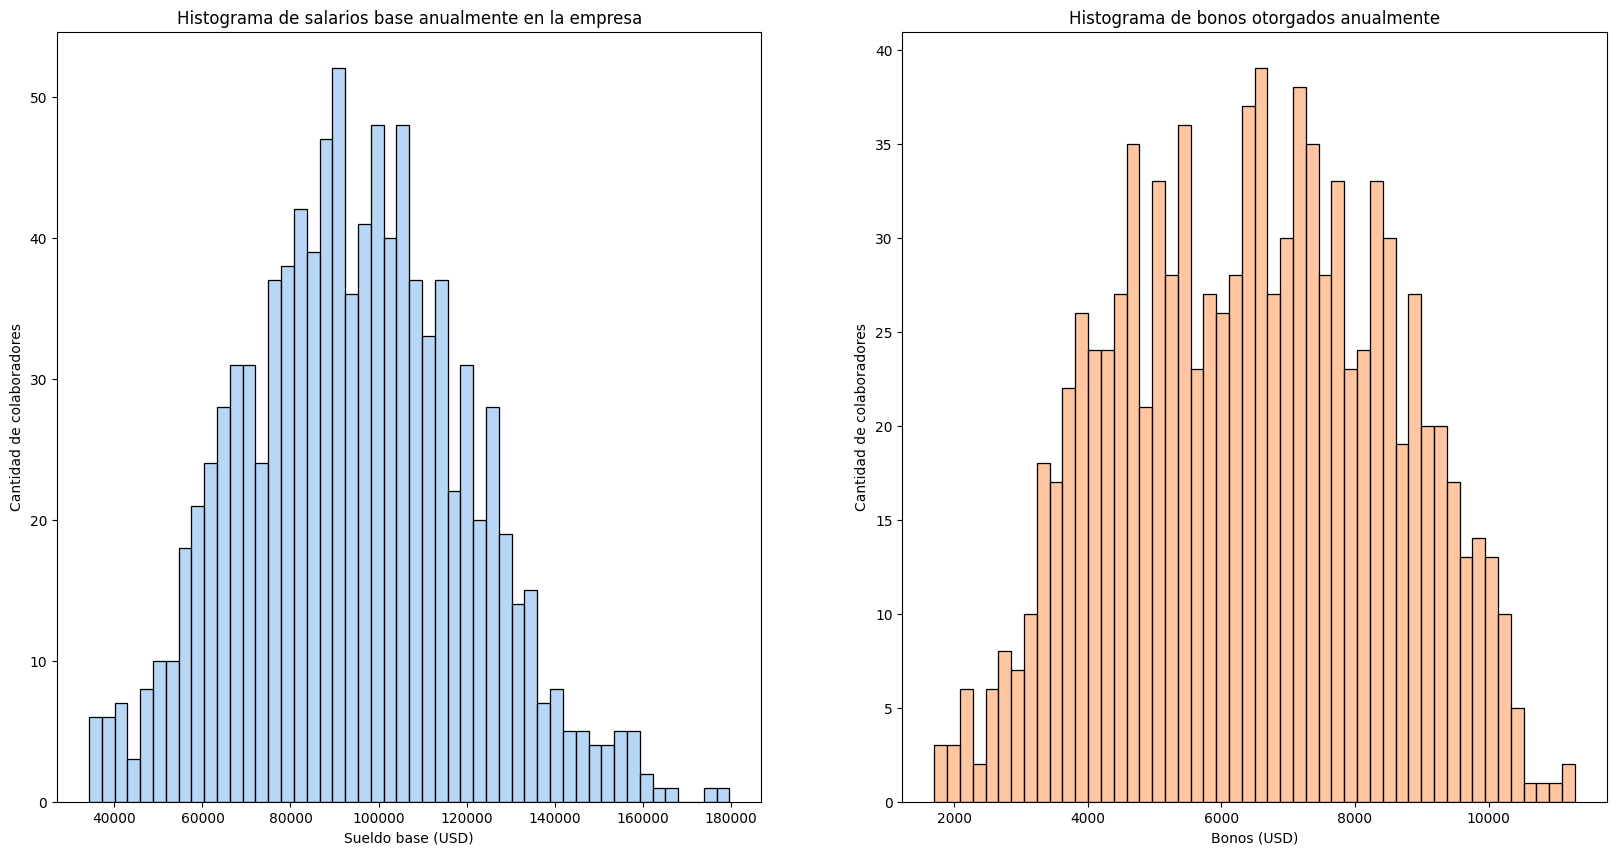

In [14]:
# subplots para salarios y bonos

fig, axes = plt.subplots(1, 2, figsize=(20,10))

# plotear el histograma en cada subplot
sns.histplot(ax=axes[0], data=data['basePay'], bins=50, color='#a1c9f4')
sns.histplot(ax=axes[1], data=data['bonus'], bins=50, color='#ffb482')

# configurar los detalles de los subplots
axes[0].set(title='Histograma de salarios base anualmente en la empresa', xlabel='Sueldo base (USD)', ylabel='Cantidad de colaboradores')
axes[1].set(title='Histograma de bonos otorgados anualmente', xlabel='Bonos (USD)', ylabel='Cantidad de colaboradores')

# ajustar la distancia entre los subplots
#plt.tight_layout()

# mostrar los subplots
plt.show()


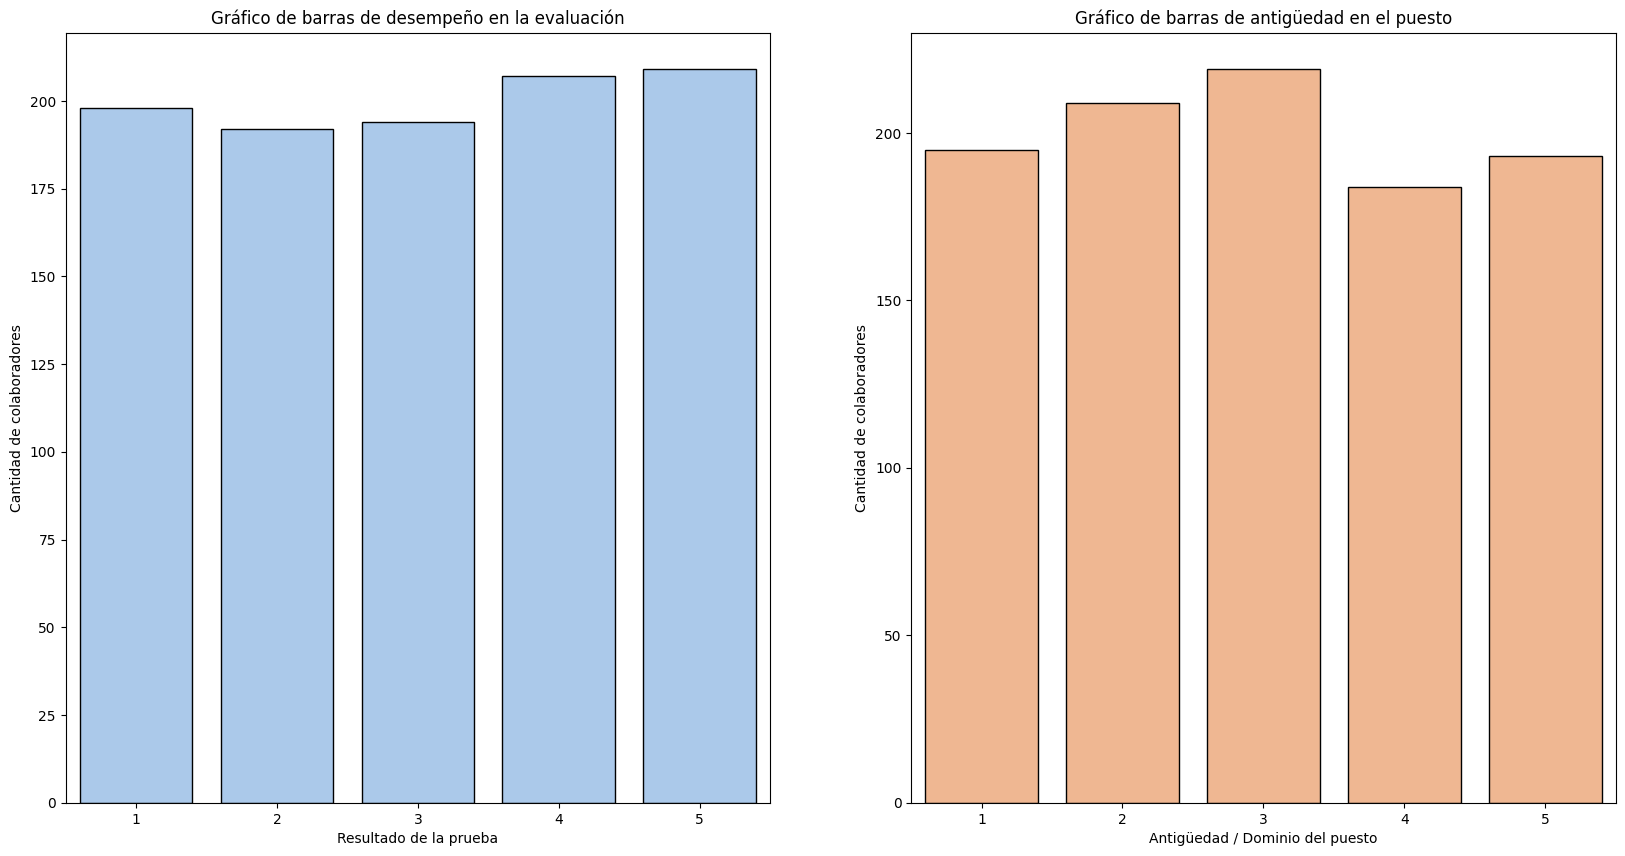

In [15]:
# Características de performance y antiguedad

# Crear subplots para los gráficos de barras
fig, axes = plt.subplots(1, 2, figsize=(20,10))

# Graficar los datos como gráficos de barras en cada subplot
sns.countplot(ax=axes[0], data=data, x='perfEval', color='#a1c9f4', edgecolor='black')
sns.countplot(ax=axes[1], data=data, x='seniority', color='#ffb482', edgecolor='black')

# Configurar los detalles de los subplots
axes[0].set(title='Gráfico de barras de desempeño en la evaluación', xlabel='Resultado de la prueba', ylabel='Cantidad de colaboradores')
axes[1].set(title='Gráfico de barras de antigüedad en el puesto', xlabel='Antigüedad / Dominio del puesto', ylabel='Cantidad de colaboradores')

# Mostrar los subplots
plt.show()



In [16]:
## rendimiento relativo



             dept  colaboradores
0      Operations            210
1           Sales            207
2      Management            198
3  Administration            193
4     Engineering            192


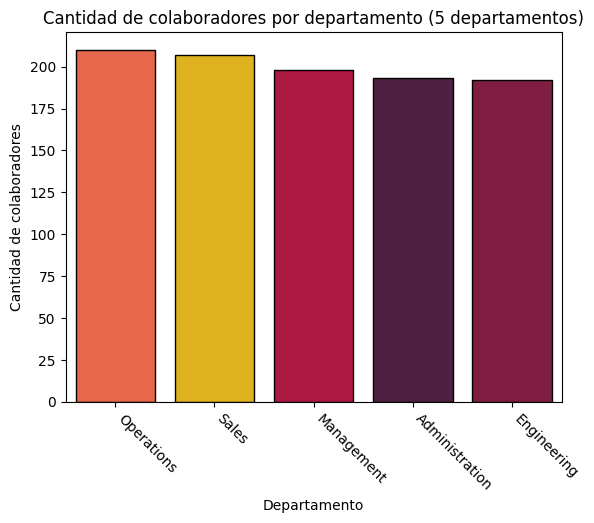

In [17]:
# departamento 

# Creamos un DataFrame con la cantidad de cada departamento
num_dept = data['dept'].value_counts().reset_index()
num_dept.columns = ['dept', 'colaboradores']

colores = ['#FF5733', '#FFC300', '#C70039', '#581845', '#900C3F']

sns.barplot(x='dept', y='colaboradores', data=num_dept, edgecolor='black',palette=colores)

print(num_dept)

plt.xlabel("Departamento")
plt.ylabel("Cantidad de colaboradores")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title(f"Cantidad de colaboradores por departamento ({len(num_dept)} departamentos)")
plt.show()

### exploracion bivariada 



In [ ]:
### funcion para boxplot



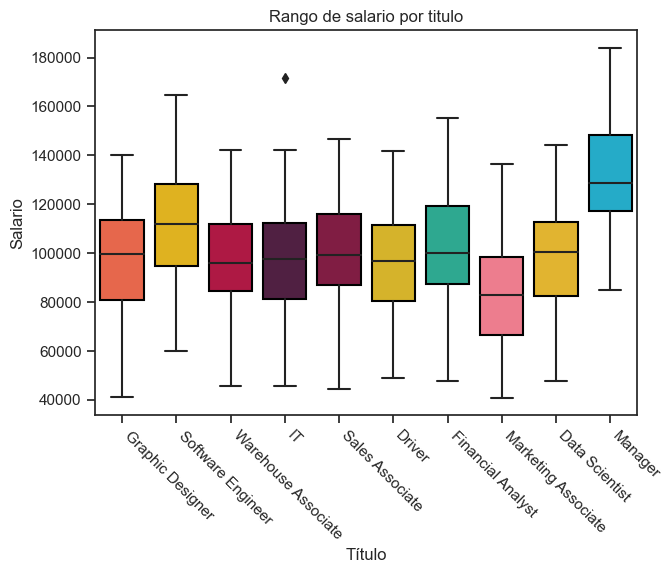

In [31]:
colores = ['#FF5733', '#FFC300', '#C70039', '#581845', '#900C3F', '#F1C40F', '#1ABC9C', '#FF6B81', '#FFC312', '#0ABDE3']

boxprops = {'edgecolor': 'black', 'linewidth': 1.5}

fig, ax = plt.subplots(figsize=(7, 5))

sns.boxplot(x='jobTitle', y='total_salary', data=data, palette=colores, boxprops=boxprops)

plt.xlabel("Título")
plt.ylabel("Salario")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title(f"Rango de salario por titulo")
plt.show()


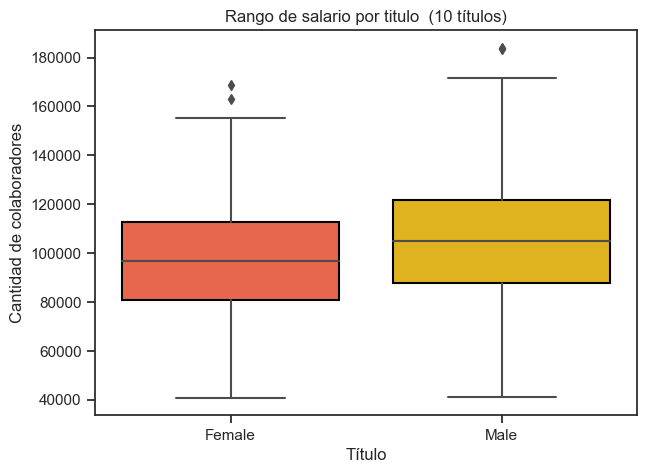

In [32]:
colores = ['#FF5733', '#FFC300', '#C70039', '#581845', '#900C3F', '#F1C40F', '#1ABC9C', '#FF6B81', '#FFC312', '#0ABDE3']

boxprops = {'edgecolor': 'black', 'linewidth': 1.5}

fig, ax = plt.subplots(figsize=(7, 5))

sns.boxplot(x='gender', y='total_salary', data=data, palette=colores, boxprops=boxprops)

plt.xlabel("Título")
plt.ylabel("Cantidad de colaboradores")
plt.title(f"Rango de salario por titulo  ({len(num_titulos)} títulos)")
plt.show()

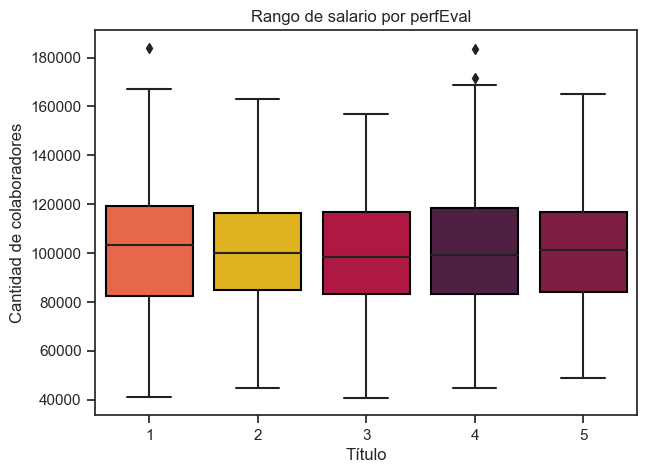

In [34]:
colores = ['#FF5733', '#FFC300', '#C70039', '#581845', '#900C3F', '#F1C40F', '#1ABC9C', '#FF6B81', '#FFC312', '#0ABDE3']

boxprops = {'edgecolor': 'black', 'linewidth': 1.5}

fig, ax = plt.subplots(figsize=(7, 5))

sns.boxplot(x='perfEval', y='total_salary', data=data, palette=colores, boxprops=boxprops)

plt.xlabel("Título")
plt.ylabel("Cantidad de colaboradores")
plt.title(f"Rango de salario por perfEval  ")
plt.show()

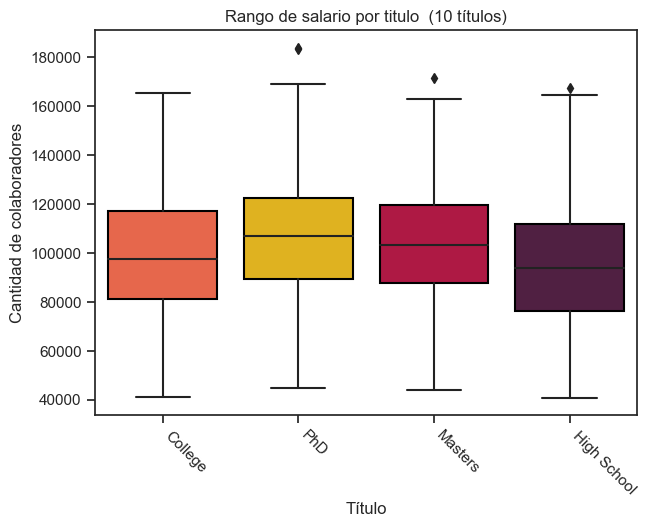

In [30]:
colores = ['#FF5733', '#FFC300', '#C70039', '#581845', '#900C3F', '#F1C40F', '#1ABC9C', '#FF6B81', '#FFC312', '#0ABDE3']

boxprops = {'edgecolor': 'black', 'linewidth': 1.5}

fig, ax = plt.subplots(figsize=(7, 5))

sns.boxplot(x='edu', y='total_salary', data=data, palette=colores, boxprops=boxprops)

plt.xlabel("Título")
plt.ylabel("Cantidad de colaboradores")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title(f"Rango de salario por edu")
plt.show()

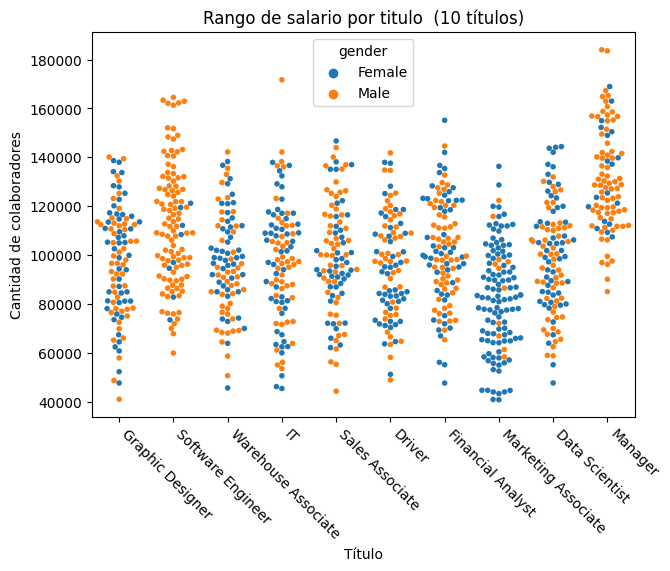

In [19]:
# Draw a categorical scatterplot to show each observation
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.swarmplot(data=data, x="jobTitle", y="total_salary", hue="gender", size=4)
ax.set(ylabel="")

plt.xlabel("Título")
plt.ylabel("Cantidad de colaboradores")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title(f"Rango de salario por titulo  ({len(num_titulos)} títulos)")
plt.show()

#### Codifiacion ordinal para la exploracion de datos.



In [20]:
data.head()

,jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus,age_group,total_salary,total_salary_range
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,0-19,52301,"40,000-80,000"
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,20-39,119604,"80,001-120,000"
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,0-19,99476,"80,001-120,000"
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,20-39,118234,"80,001-120,000"
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,20-39,108783,"80,001-120,000"


In [21]:

encoder = ColumnTransformer(
    [('encoder', OrdinalEncoder(), ['jobTitle', 'gender','edu','dept','age_group','total_salary_range'])],
    remainder='passthrough'
)

data_encoded = encoder.fit_transform(data)

encoder_categories = encoder.named_transformers_['encoder'].categories_

print("\nCategorías asignadas:")
for i, categories in enumerate(encoder_categories):
    print(f"Variable {i}: {dict(zip(categories, range(len(categories))))}")



Categorías asignadas:
Variable 0: {'Data Scientist': 0, 'Driver': 1, 'Financial Analyst': 2, 'Graphic Designer': 3, 'IT': 4, 'Manager': 5, 'Marketing Associate': 6, 'Sales Associate': 7, 'Software Engineer': 8, 'Warehouse Associate': 9}
Variable 1: {'Female': 0, 'Male': 1}
Variable 2: {'College': 0, 'High School': 1, 'Masters': 2, 'PhD': 3}
Variable 3: {'Administration': 0, 'Engineering': 1, 'Management': 2, 'Operations': 3, 'Sales': 4}
Variable 4: {'0-19': 0, '20-39': 1, '40-59': 2, '60+': 3}
Variable 5: {'120,001-160,000': 0, '40,000-80,000': 1, '80,001-120,000': 2, '> 160,000': 3}


In [22]:
data.head()

,jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus,age_group,total_salary,total_salary_range
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,0-19,52301,"40,000-80,000"
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,20-39,119604,"80,001-120,000"
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,0-19,99476,"80,001-120,000"
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,20-39,118234,"80,001-120,000"
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,20-39,108783,"80,001-120,000"


In [23]:
data_encoded = pd.DataFrame(data_encoded)
data_encoded.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.0,0.0,0.0,3.0,0.0,1.0,18.0,5.0,2.0,42363.0,9938.0,52301.0
1,8.0,1.0,0.0,2.0,1.0,2.0,21.0,5.0,5.0,108476.0,11128.0,119604.0
2,9.0,0.0,3.0,0.0,0.0,2.0,19.0,4.0,5.0,90208.0,9268.0,99476.0
3,8.0,1.0,2.0,4.0,1.0,2.0,20.0,5.0,4.0,108080.0,10154.0,118234.0
4,3.0,1.0,2.0,1.0,1.0,2.0,26.0,5.0,5.0,99464.0,9319.0,108783.0


/var/folders/b4/byvs82796v16gm0ljjgxxrdm0000gn/T/ipykernel_20941/3815804752.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


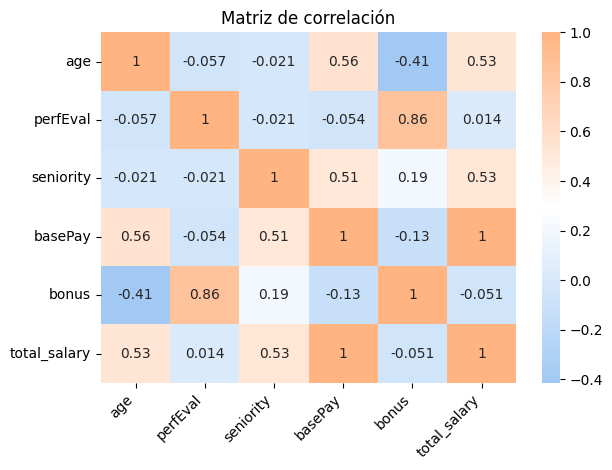

In [24]:


colors = ['#a1c9f4', '#ffffff', '#ffb482']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)

corr_matrix = data.corr()

sns.heatmap(corr_matrix, cmap=cmap, annot=True)

plt.title("Matriz de correlación")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


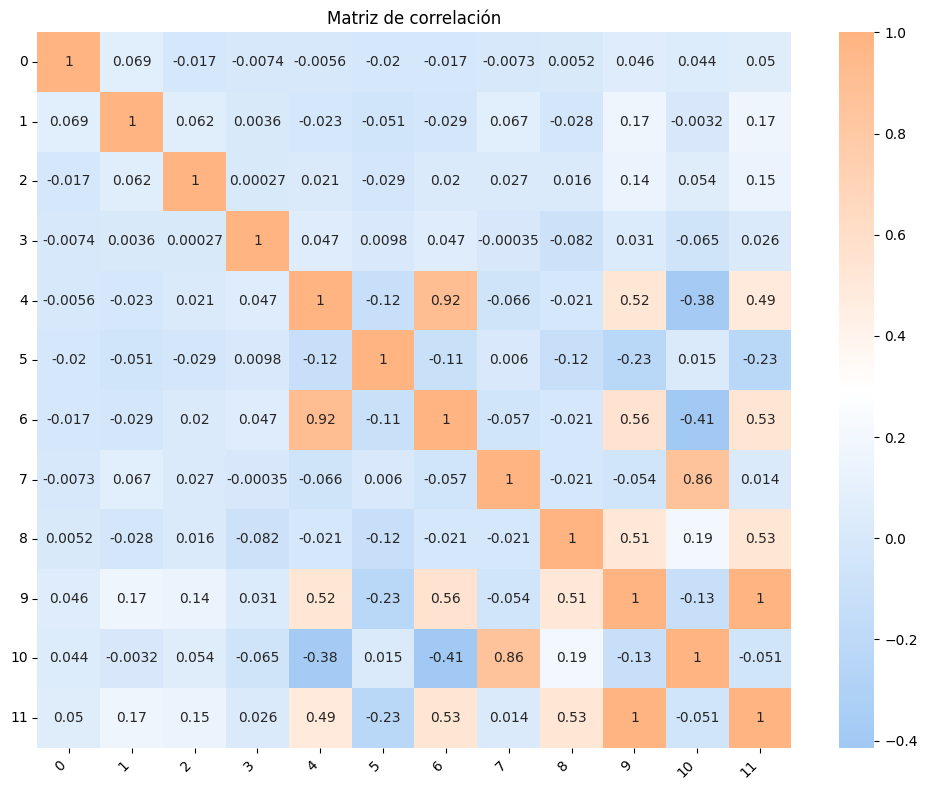

In [25]:


colors = ['#a1c9f4', '#ffffff', '#ffb482']
cmap = LinearSegmentedColormap.from_list('mycmap', colors)

corr_matrix = data_encoded.corr()

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, cmap=cmap, annot=True, ax=ax)

plt.title("Matriz de correlación")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

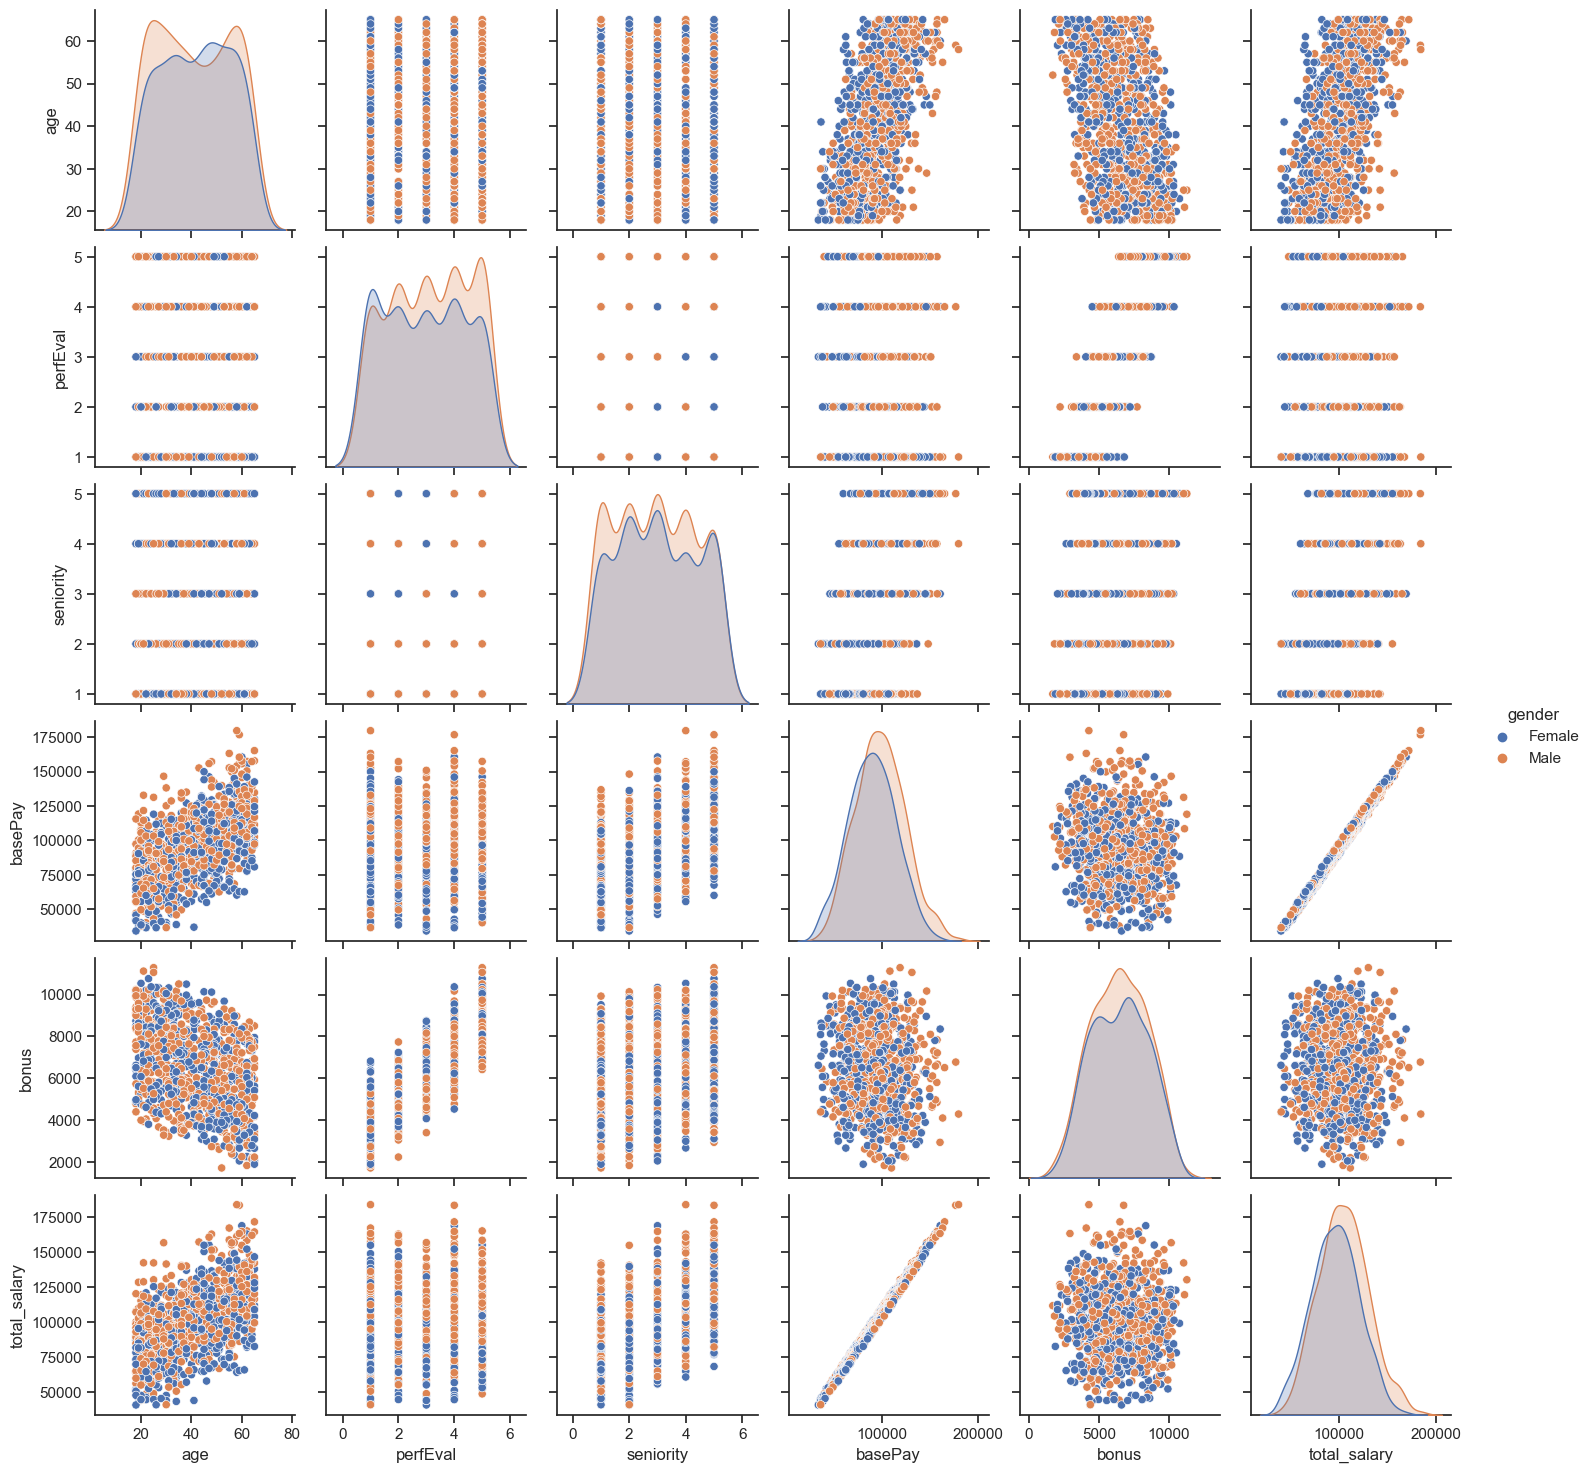

In [26]:
new_data = data[['age','basePay','bonus','gender']]

sns.set_theme(style="ticks")
sns.pairplot(data=data, hue="gender")

In [ ]:
### Test de hipotesis 

### Conclusiones del EDA